In [1]:
import os
import requests
import numpy as np
import pandas as pd

def create_tf_serving_json(data):
  return {'inputs': {name: data[name].tolist() for name in data.keys()} if isinstance(data, dict) else data.tolist()}

def score_model(dataset):
  url = 'https://adb-8756109169069044.4.azuredatabricks.net/model/expected_punt_return_yardage/2/invocations'
  headers = {'Authorization': f'Bearer {os.environ.get("DATABRICKS_TOKEN")}'}
  data_json = dataset.to_dict(orient='split') if isinstance(dataset, pd.DataFrame) else create_tf_serving_json(dataset)
  response = requests.request(method='POST', headers=headers, url=url, json=data_json)
  if response.status_code != 200:
    raise Exception(f'Request failed with status {response.status_code}, {response.text}')
  return response.json()

In [3]:
label = 'kickReturnYardage'
prediction_record = pd.read_csv('../data/raw/prediction_record.csv')
 
# Drop label column for inference
prediction_record = prediction_record.drop([label], axis=1)
prediction_record.head()

quarter  yardsToGo  preSnapHomeScore  preSnapVisitorScore  snapTime  \
0        1         14                 0                    0      0.83   

   hangTime  operationTime  kickLength  penaltyYards  \
0      4.59           2.21          51           NaN   

   speedYardsSecondReturner  speedYardsSecondSquaredReturner  \
0                      3.48                             1.35   

   distanceTravelledPriorReturner  returnerOrientationDegrees  \
0                            0.36                      215.08   

   returnerAngleOfPlayerMotion  distance_returner_gunner1  \
0                       159.97                  21.614809   

   distance_returner_gunner2  y_football_rescaled  
0                   21.16458                 24.5

In [12]:
json_payload = create_tf_serving_json(prediction_record.to_dict(orient='records')[0])

AttributeError: 'int' object has no attribute 'tolist'

In [1]:
import pandas as pd
X_train = pd.read_csv('../data/X_train.csv')

In [2]:
import joblib
filename = '../expected_yards.joblib.pkl'
model = joblib.load(filename)

c:\Users\mjpearl\Desktop\projects\brookfield\env_bfr\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
c:\Users\mjpearl\Desktop\projects\brookfield\env_bfr\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 1.0.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [10]:
import numpy as np
#np.array(prediction_record)
model.predict(np.array(prediction_record))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [4]:
import shap
# compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

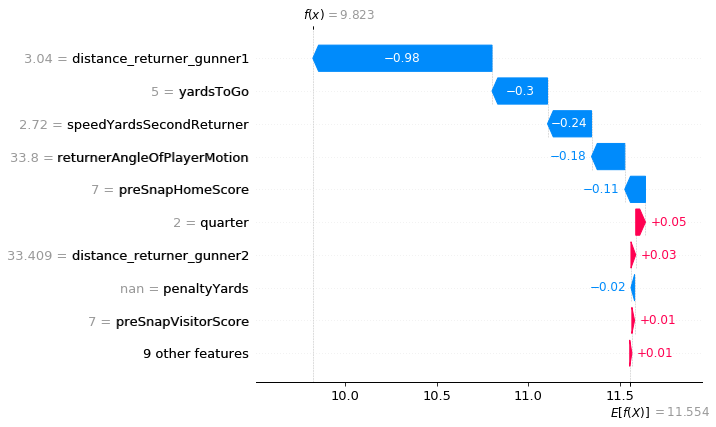

In [5]:
shap.plots.waterfall(shap_values[0])